<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/przetwarzanie_grafiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# przygotowanie katalogu roboczego do pracy :)
import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['example1.jpg', 'forest_light.png', 'img2_light.png', 'panorama_1.jpg']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/Python/raw/master/Pliki/"+nazwa, nazwa)

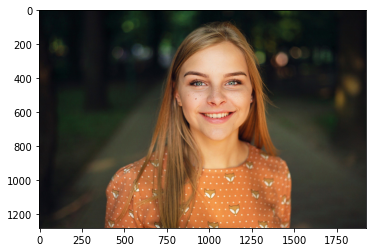

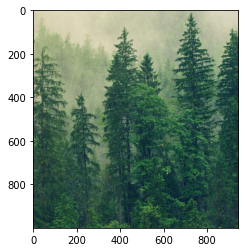

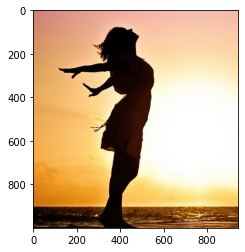

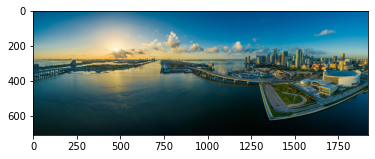

In [2]:
import numpy as np
import matplotlib.pyplot as plt

for nazwa in nazwyPlikow:
  img = plt.imread(nazwa)
  plt.imshow(img)
  plt.show()

In [3]:

my_img = plt.imread("example1.jpg")
print(f"Wymiary obrazu {my_img.shape}")

Wymiary obrazu (1280, 1920, 3)


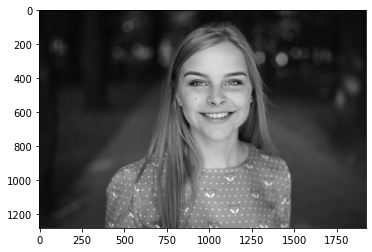

In [7]:
from skimage.color import rgb2gray
from skimage import morphology

my_img_gr = rgb2gray(my_img)
plt.imshow(my_img_gr, cmap=plt.cm.gray)

min 0.0013988235294117646 max 0.9975


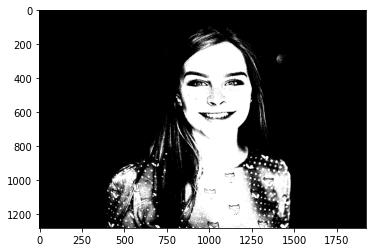

In [10]:
binary = my_img_gr > 0.5
print(f"min {np.min(my_img_gr)} max {np.max(my_img_gr)}")
plt.imshow(binary, cmap=plt.cm.gray)
plt.show()

0.3496451332720588


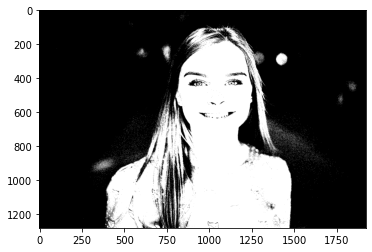

In [13]:
from skimage import filters

th = filters.threshold_otsu(my_img_gr)
print(th)

binary = my_img_gr > th
plt.imshow(binary, cmap=plt.cm.gray)
plt.show()

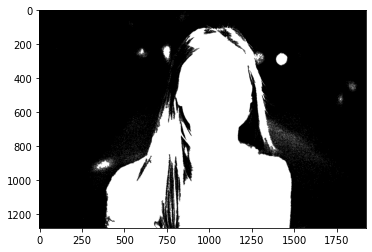

In [16]:
binary_remove = morphology.remove_small_holes(binary, area_threshold=2000)
plt.imshow(binary_remove, cmap=plt.cm.gray)
plt.show()

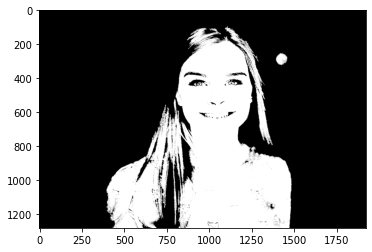

In [18]:
binary_without_obj = morphology.remove_small_objects(binary, min_size=2000)
plt.imshow(binary_without_obj, cmap=plt.cm.gray)
plt.show()

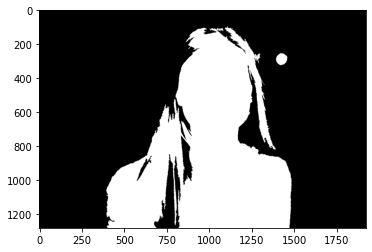

In [20]:
binary_without_obj = morphology.remove_small_objects(binary_remove, min_size=3000)
plt.imshow(binary_without_obj, cmap=plt.cm.gray)
plt.show()

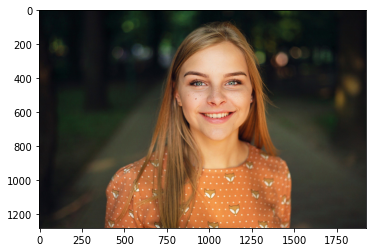

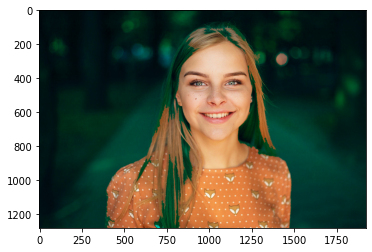

In [23]:
my_img = plt.imread("example1.jpg")

my_img1 = my_img.copy()
my_img1[~binary_without_obj, 0] = 0
plt.imshow(my_img)
plt.show()
plt.imshow(my_img1)
plt.show() 

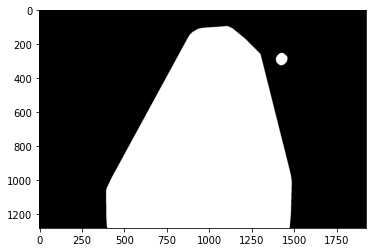

In [25]:
hull = morphology.convex_hull_object(binary_without_obj)
plt.imshow(hull, cmap=plt.cm.gray)
plt.show()

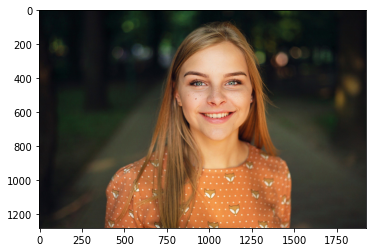

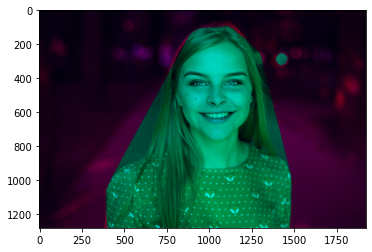

In [27]:
my_img = plt.imread("example1.jpg")

my_img1 = my_img.copy()
my_img1[~hull, 1] = 0
my_img1[hull, 0] = 0
plt.imshow(my_img)
plt.show()
plt.imshow(my_img1)
plt.show() 

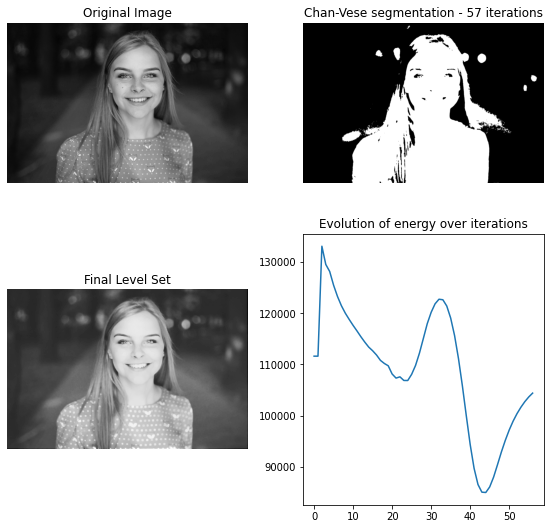

In [24]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

img_path = "example1.jpg"
my_img = plt.imread(img_path)
my_img_gr = rgb2gray(my_img)

# Feel free to play around with the parameters to see how they impact the result

cv = chan_vese(my_img_gr, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=70, dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(my_img_gr, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

(1000, 944, 4) (1000, 944, 4)
0.4628906


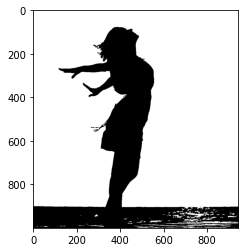

In [33]:
from skimage.color import rgba2rgb
forest = plt.imread("forest_light.png")
sunset = plt.imread("img2_light.png")
print(f"{forest.shape} {sunset.shape}")

forest_gr =rgb2gray(rgba2rgb(forest)) 
sunset_gr =rgb2gray(rgba2rgb(sunset)) 

th = filters.threshold_otsu(sunset_gr)
print(th)
mask = sunset_gr > th
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()

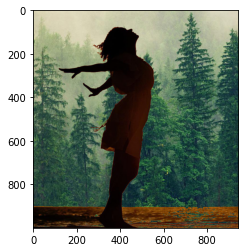

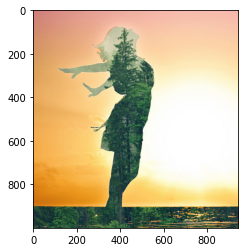

In [34]:
sunset_forest1 = sunset.copy()
sunset_forest1[mask, :] = forest[mask, :] 

sunset_forest2 = sunset.copy()
sunset_forest2[~mask, :] = forest[~mask, :] 

plt.imshow(sunset_forest1)
plt.show()

plt.imshow(sunset_forest2)
plt.show()


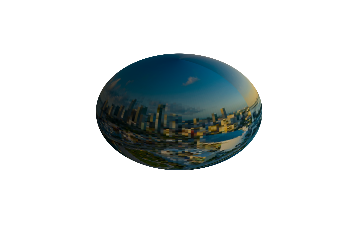

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mpl_sphere(image_file):
    img = plt.imread(image_file)

    # define a grid matching the map size, subsample along with pixels
    theta = np.linspace(0, np.pi, img.shape[0])
    phi = np.linspace(0, 2*np.pi, img.shape[1])

    count = 180 # keep 180 points along theta and phi
    theta_inds = np.linspace(0, img.shape[0] - 1, count).round().astype(int)
    phi_inds = np.linspace(0, img.shape[1] - 1, count).round().astype(int)
    theta = theta[theta_inds]
    phi = phi[phi_inds]
    img = img[np.ix_(theta_inds, phi_inds)]

    theta,phi = np.meshgrid(theta, phi)
    R = 1

    # sphere
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)

    # create 3d Axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x.T, y.T, z.T, facecolors=img/255, cstride=1, rstride=1) # we've already pruned ourselves

    # make the plot more spherical
    ax.axis('off')
    ax.grid(False)
    fig.savefig("sfera.png", dpi=600)
    #ax.axis('scaled')


if __name__ == "__main__":
    image_file = 'panorama_1.jpg'
    mpl_sphere(image_file)
    plt.show()